In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import datetime, timedelta
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import optuna
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib
import shap
import streamlit

/mnt/c/Users/DustinLamblin/programming/general_analysis/general_analysis/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# AREA OF IMPROVEMENT
- Pick different model
- Pick different score
- Automated hyper parameter tuning
- UI interface load excel file and show result

In [3]:
def prepare_datasets(input_data):
    X = input_data.iloc[:,:-1]
    y = input_data.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1, shuffle=True
    )
    return X_train, y_train, X_test, y_test

In [4]:
input_data=pd.read_csv("input_data/hapiness.csv")
X_train, y_train, X_test, y_test=prepare_datasets(input_data)

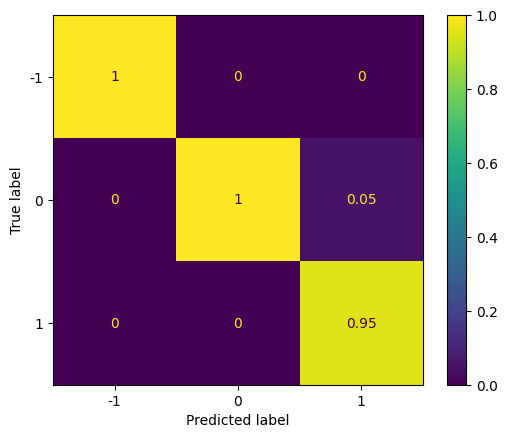

In [5]:
top_model_happiness=RandomForestClassifier(max_depth= 6, min_samples_leaf=1, min_samples_split= 4,n_estimators=350,class_weight="balanced")
top_model_happiness.fit(X_train, y_train)
y_pred_train= top_model_happiness.predict(X_train)
y_pred_test= top_model_happiness.predict(X_test)
cfn_train=confusion_matrix(y_pred_train,y_train,normalize="pred")
cfn_test=confusion_matrix(y_pred_test,y_test,normalize="pred")
disp = ConfusionMatrixDisplay(confusion_matrix=cfn_train,display_labels=top_model_happiness.classes_)
disp.plot()

In [6]:
import pickle
# pickle.dump(top_model_happiness, open('saved_model/hapiness_model.sav', 'wb'))


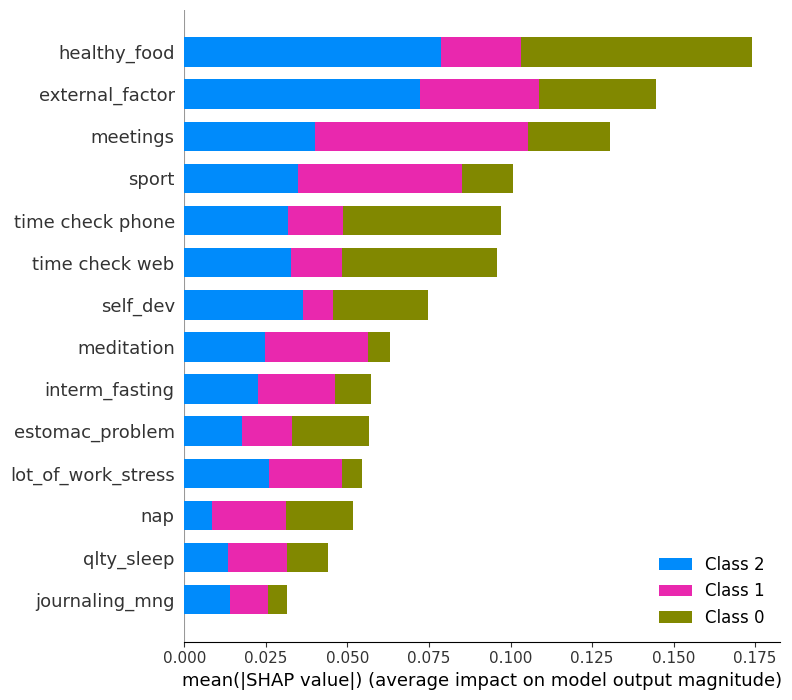

In [7]:
shap_values = shap.TreeExplainer(top_model_happiness).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values[0], X_train, plot_type="violin")

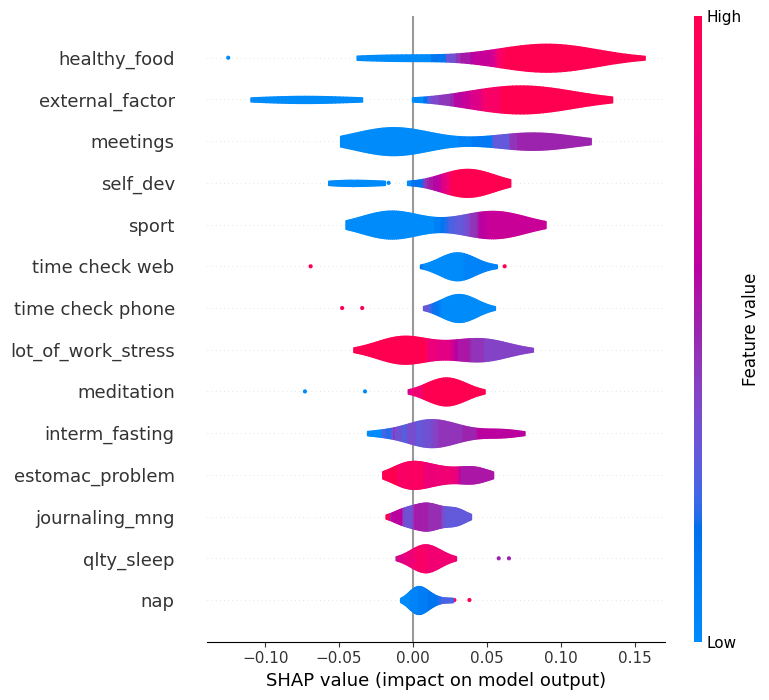

In [8]:
shap.summary_plot(shap_values[2],X_train, plot_type="violin")

TypeError: summary_legacy() got an unexpected keyword argument 'ax'

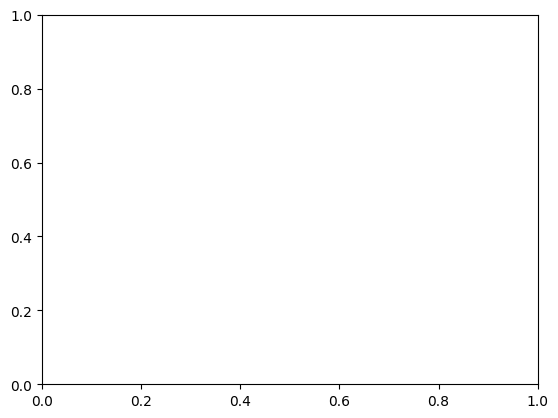

In [12]:
import matplotlib.pyplot as plt 
# Calculate shap_values
shap.summary_plot(shap_values[2],X_train, show=False,ax=plt.gca())
ax = plt.gca()
# You can change the min and max value of xaxis by changing the arguments of:
ax.set_xlim(-0.5, 0.5) 
plt.show()